In [206]:
%pylab inline
xi11 = np.loadtxt('/mnt/store1/oliverphilcox/MultiXiDR12/xi_n59_m24_11.dat',skiprows=2)
xi12 = np.loadtxt('/mnt/store1/oliverphilcox/MultiXiDR12/xi_n59_m24_12.dat',skiprows=2)
xi22 = np.loadtxt('/mnt/store1/oliverphilcox/MultiXiDR12/xi_n59_m24_22.dat',skiprows=2)#MultiXiDR12/xi_n59_m24_22.dat',skiprows=2)

Populating the interactive namespace from numpy and matplotlib


In [207]:
rs=np.genfromtxt('/mnt/store1/oliverphilcox/MultiXiDR12/xi_n59_m24_11.dat',skip_header=0,max_rows=1)
mus=np.genfromtxt('/mnt/store1/oliverphilcox/MultiXiDR12/xi_n59_m24_11.dat',skip_header=1,max_rows=1)

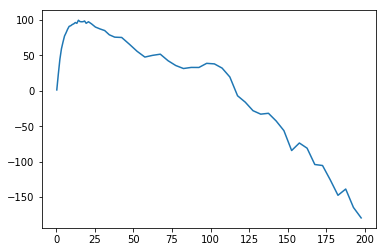

In [218]:
#plt.plot(rs,xi11.mean(axis=1)*rs**2.)
plt.plot(rs,xi12.mean(axis=1)*rs**2.)
#plt.plot(rs,xi22.mean(axis=1)*rs**2.)

In [219]:
dat=np.load('/mnt/store1/oliverphilcox/MultiXiDR12/all_xi.npz')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/store1/oliverphilcox/MultiXiDR12/all_xi.npz'

In [189]:
DD=dat.f.DD.reshape(59,24)
RR=dat.f.RR.reshape(59,24)
DR=dat.f.DR.reshape(59,24)
xi=dat.f.xi

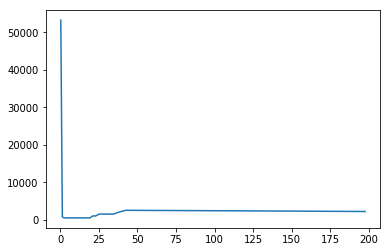

In [190]:
plt.errorbar(rs,RR.mean(axis=1)/rs**2.);
#plt.xlim([0,20]);plt.ylim([0,1000])

<ErrorbarContainer object of 3 artists>

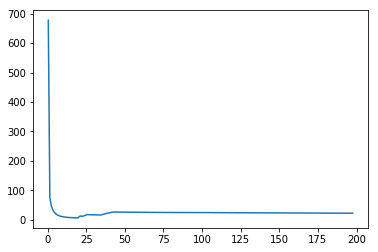

In [191]:
plt.errorbar(rs,DD.mean(axis=1)/rs**2.)

<ErrorbarContainer object of 3 artists>

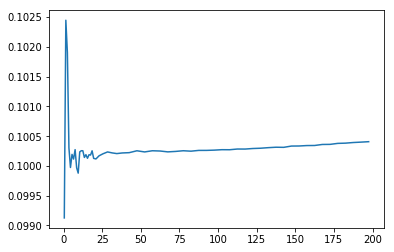

In [192]:
plt.errorbar(rs,DR.mean(axis=1)/RR.mean(axis=1))

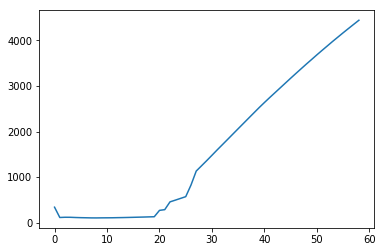

In [193]:
plt.plot(DD.mean(axis=1)/rs)

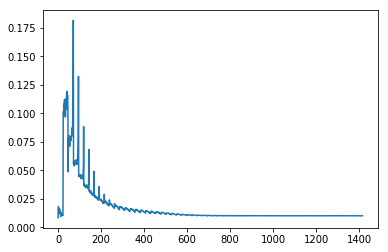

In [199]:
plt.plot(dat.f.DD/dat.f.RR)

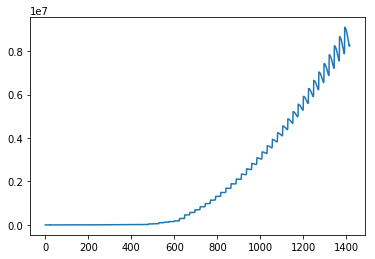

In [196]:
plt.plot(dat.f.DR)

In [168]:
Rname = '/mnt/store1/oliverphilcox/DR12Data/dr12_LOWZ_North_x10.txt'
rX,rY,rZ,rW = [np.zeros(100000) for _ in range(4)]
for n, line in enumerate(open(Rname, 'r')):
    if n==100000:
        break
    split_line=np.array(line.split(" "), dtype=float) 
    rX[n]=split_line[0];
    rY[n]=split_line[1];
    rZ[n]=split_line[2];
    rW[n]=split_line[3];

Dname = '/mnt/store1/oliverphilcox/DR12Data/galaxies_dr12_LOWZ_North.txt'
dX,dY,dZ,dW = [np.zeros(300000) for _ in range(4)]
for n, line in enumerate(open(Dname, 'r')):
    if n==300000:
        break
    split_line=np.array(line.split(" "), dtype=float) 
    dX[n]=split_line[0];
    dY[n]=split_line[1];
    dZ[n]=split_line[2];
    dW[n]=split_line[3];
        

In [220]:
## Coordinate transformations
def coord_transform(x,y,z):
    # Convert the X,Y,Z coordinates into Ra,Dec,comoving_distance (for use in corrfunc)
    # Shamelessly stolen from astropy
    xsq = x ** 2.
    ysq = y ** 2.
    zsq = z ** 2.

    com_dist = (xsq + ysq + zsq) ** 0.5
    s = (xsq + ysq) ** 0.5 

    if np.isscalar(x) and np.isscalar(y) and np.isscalar(z):
        Ra = math.atan2(y, x)*180./np.pi
        Dec = math.atan2(z, s)*180./np.pi
    else:
        Ra = np.arctan2(y, x)*180./np.pi+180.
        Dec = np.arctan2(z, s)*180./np.pi

    return com_dist, Ra, Dec


In [222]:
r_com,Ra,dec=coord_transform(dX,dY,dZ)

In [232]:
r_com

array([2.24695806e-03, 1.48299380e-01, 2.50161585e-01, ...,
       2.14622681e+03, 2.15158008e+03, 2.19602710e+03])

(array([4.7756e+04, 9.0852e+04, 6.5395e+04, 4.8651e+04, 3.1675e+04,
        1.3637e+04, 1.9580e+03, 5.4000e+01, 1.3000e+01, 9.0000e+00]),
 array([ -91.83514151,   91.89365799,  275.62245749,  459.35125698,
         643.08005648,  826.80885598, 1010.53765548, 1194.26645498,
        1377.99525447, 1561.72405397, 1745.45285347]),
 <a list of 10 Patch objects>)

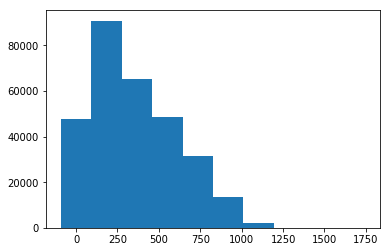

In [83]:
plt.hist(dZ)

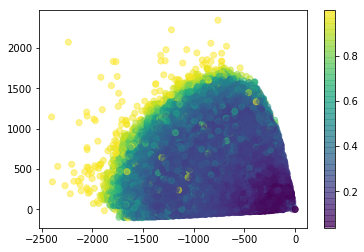

In [84]:
plt.scatter(rX,rZ,c=rW,alpha=0.5)
plt.colorbar()

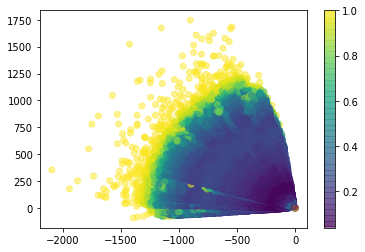

In [85]:
plt.scatter(dX,dZ,c=dW,alpha=0.5)
plt.colorbar()